In [1]:
"""
Introduction to Survival Analysis
https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html
"""

'\nIntroduction to Survival Analysis\nhttps://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html\n'

In [2]:
pip install lifelines

In [0]:
from lifelines.plotting import plot_lifetimes
from numpy.random import uniform, exponential
import numpy as np
import matplotlib.pyplot as plt

In [0]:
N = 25
current_time = 10
actual_lifetimes = np.array([[exponential(12),
  exponential(2)][uniform() < 0.5] for i in range(N)])
observed_lifetimes = np.minimum(actual_lifetimes, 
                                current_time)
observed = actual_lifetimes < current_time

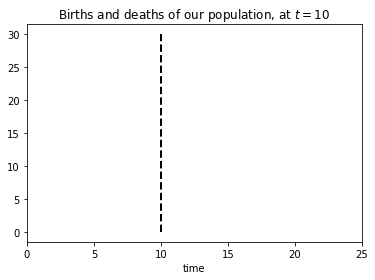

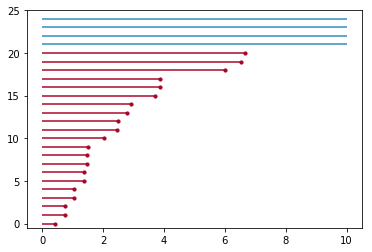

In [5]:
plt.xlim(0, 25)
plt.vlines(10, 0, 30, lw=2, linestyles='--')
plt.xlabel("time")
plt.title("Births and deaths of our population, at $t=10$")
plot_lifetimes(observed_lifetimes, event_observed=observed)

In [6]:
print("Observed lifetimes at time %d:\n" % (current_time), observed_lifetimes)


Observed lifetimes at time 10:
 [ 3.8683096   6.5449969   2.5031821   2.47491139  3.87974208  2.92467912
 10.         10.          2.78826725  1.36802492  6.01454144  0.74765758
  1.5130148   1.47558294  1.05754482  1.35989596 10.          2.04528044
  6.65739521  1.48392206  0.42485813  3.69853187  0.74070677  1.04917658
 10.        ]


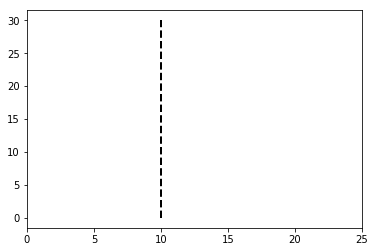

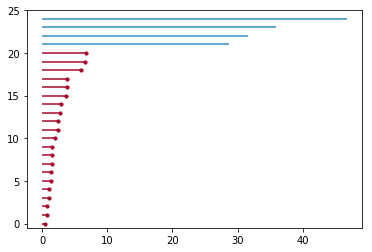

In [7]:
plt.xlim(0,25)
plt.vlines(10, 0, 30, lw=2, linestyles='--')
plot_lifetimes(actual_lifetimes, event_observed=observed)

In [8]:
import pandas as pd
from lifelines.datasets import load_dd
data = load_dd()
data.sample(5)
#the boolean columns `observed` refers to whether the death (leaving office)
#was observed or not.

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
1613,Thailand,800,800.0,South-Eastern Asia,Asia,Chatichai Choonhavan,Chatichai Choonhavan.Thailand.1988.1990.Parlia...,Democracy,Parliamentary Dem,1988,3,1
1145,Nicaragua,93,93.0,Central America,Americas,Anastasio Somoza Debayle,Anastasio Somoza Debayle.Nicaragua.1967.1978.M...,Non-democracy,Military Dict,1967,12,1
68,Australia,900,900.0,Australia and New Zealand,Oceania,William McMahon,William McMahon.Australia.1971.1971.Parliament...,Democracy,Parliamentary Dem,1971,1,1
1151,Nicaragua,93,93.0,Central America,Americas,Josï¿½ Daniel Ortega Saavedra,Josï¿½ Daniel Ortega Saavedra.Nicaragua.2007.2...,Democracy,Presidential Dem,2007,2,0
558,France,220,220.0,Western Europe,Europe,Pierre Messmer,Pierre Messmer.France.1972.1973.Mixed Dem,Democracy,Mixed Dem,1972,2,1


In [9]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

T = data["duration"]
E = data["observed"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

In [10]:
kmf.median_

4.0

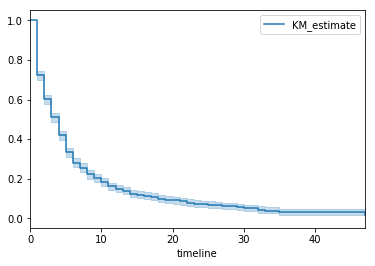

In [11]:
kmf.plot()

Median survival time of democratic: 3.0
Median survival time of non-democratic: 6.0


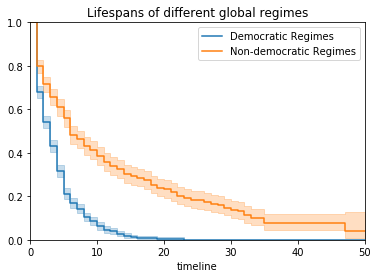

In [12]:
ax = plt.subplot(111)
dem = (data["democracy"] == "Democracy")

t = np.linspace(0, 50, 51)
kmf.fit(T[dem], event_observed=E[dem], timeline=t, 
        label="Democratic Regimes")
ax = kmf.plot(ax=ax)
print("Median survival time of democratic:", kmf.median_)

kmf.fit(T[~dem], event_observed=E[~dem], timeline=t, 
        label="Non-democratic Regimes")
ax = kmf.plot(ax=ax)
print("Median survival time of non-democratic:", kmf.median_)

plt.ylim(0,1)
plt.title("Lifespans of different global regimes"); 

In [13]:
from lifelines.statistics import logrank_test
results = logrank_test(T[dem], T[~dem], 
                E[dem], E[~dem], alpha=.99)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
 test_statistic      p  -log2(p)
         260.47 <0.005    192.23


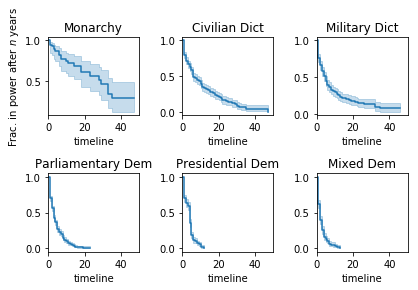

In [14]:
regime_types = data['regime'].unique()

for i,regime_type in enumerate(regime_types):
    ax = plt.subplot(2, 3, i+1)
    ix = data['regime'] == regime_type
    kmf.fit( T[ix], E[ix], label=regime_type)
    kmf.plot(ax=ax, legend=False)
    plt.title(regime_type)
    plt.xlim(0, 50)
    if i==0:
        plt.ylabel('Frac. in power after $n$ years')
plt.tight_layout()

In [15]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(T,event_observed=E)
print(naf.cumulative_hazard_.head())

          NA_estimate
timeline             
0.0          0.000000
1.0          0.325912
2.0          0.507356
3.0          0.671251
4.0          0.869867


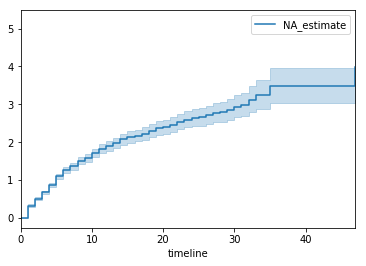

In [16]:
naf.plot()

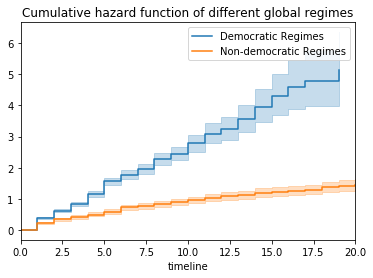

In [17]:
naf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
ax = naf.plot(loc=slice(0, 20))
naf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
naf.plot(ax=ax, loc=slice(0, 20))
plt.title("Cumulative hazard function of different global regimes");